In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
#In this code, we're setting ssl._create_default_https_context to ssl._create_unverified_context
#bypasses SSL certificate verification
#(not recommended for production environments because it disables a crucial security check)

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
#Normalisation

X_train=X_train/255
X_test=X_test/255

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

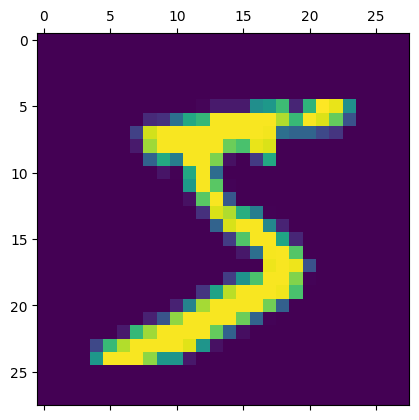

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [13]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 350us/step - loss: 0.4665 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 1s 344us/step - loss: 0.3036 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 1s 342us/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 340us/step - loss: 0.2727 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 339us/step - loss: 0.2665 - accuracy: 0.9260


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 311us/step - loss: 0.2696 - accuracy: 0.9246


[0.26955875754356384, 0.9246000051498413]

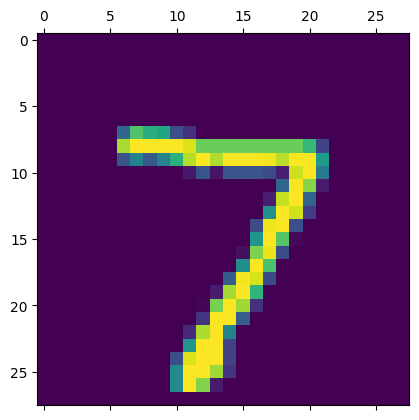

In [15]:
plt.matshow(X_test[0])

In [16]:
y_pred=model.predict(X_test_flattened)
y_pred[0]

313/313 [==============================] - 0s 283us/step


array([2.1790266e-02, 3.3473370e-07, 5.9347577e-02, 9.6362752e-01,
       2.1187400e-03, 1.3329607e-01, 1.6817960e-06, 9.9979192e-01,
       8.3138011e-02, 6.2055063e-01], dtype=float32)

In [17]:
np.argmax(y_pred[0])

7

In [18]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  930,   17,    9,    2,   11,    9,   36,    3],
       [   4,    0,   20,  923,    1,   23,    2,    9,   22,    6],
       [   1,    1,    5,    1,  927,    0,   10,    4,   11,   22],
       [  10,    3,    3,   34,   12,  774,   15,    6,   30,    5],
       [  11,    3,    8,    1,    8,   12,  911,    2,    2,    0],
       [   1,    6,   25,    6,    6,    0,    0,  958,    3,   23],
       [   7,    6,    8,   25,    9,   26,   10,   13,  866,    4],
       [  11,    7,    1,   12,   48,    6,    0,   32,    8,  884]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

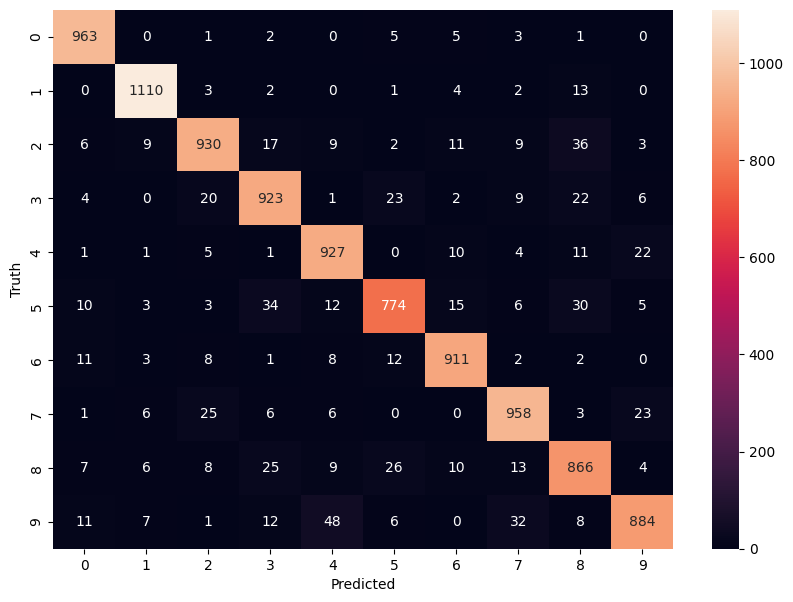

In [20]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 522us/step - loss: 0.2700 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 1s 511us/step - loss: 0.1217 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 1s 502us/step - loss: 0.0841 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 1s 501us/step - loss: 0.0649 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 1s 505us/step - loss: 0.0518 - accuracy: 0.9841


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 378us/step - loss: 0.0796 - accuracy: 0.9755


[0.07961226254701614, 0.9754999876022339]

Text(95.72222222222221, 0.5, 'Truth')

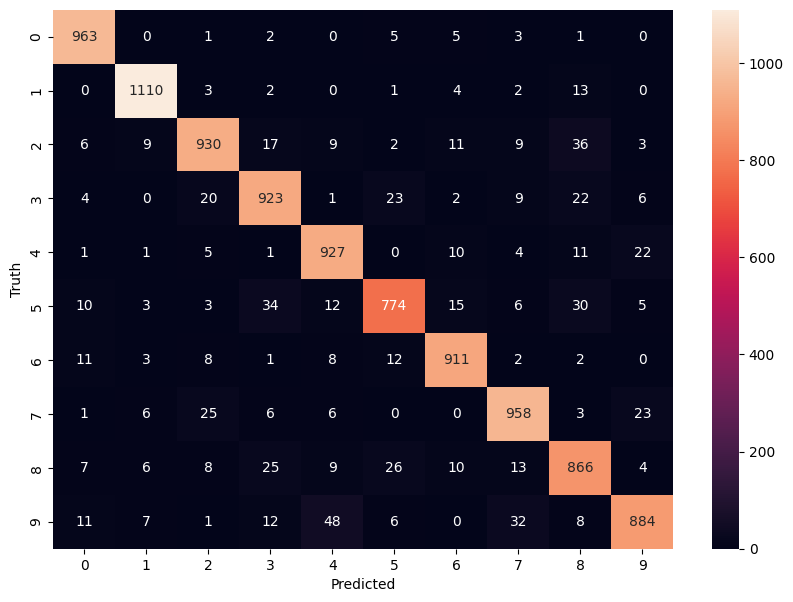

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 517us/step - loss: 0.2744 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 1s 503us/step - loss: 0.1262 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 1s 502us/step - loss: 0.0880 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 1s 546us/step - loss: 0.0662 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 1s 507us/step - loss: 0.0521 - accuracy: 0.9843
